# Sleep Analysis
![Sleep 101](https://sph.umich.edu/pursuit/2020posts/2020images/Sleep101.jpg)

### About the dataset
The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Problem
Sleep is one of the most important factor in leading a healthy lifestyle. We spend about a third of our lives sleeping — or at least we should. But unfortunately, many of us fall short of that goal. According to a research, insomnia or "lack of sleep" affects about one-third of the population.


### Solution 
Using the dataset in the notebook, a classifier model is created to predict whether the person has a sleep disorder or not.

### Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numbers as np
import warnings 
warnings.filterwarnings("ignore")
                       

### Reading the dataset

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### EDA and Cleaning

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
df.shape

(374, 13)

In [6]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Person ID doesn't seems to have any correlation with the dataset and so we will be dropping it.

In [8]:
df=df.drop('Person ID', axis=1)

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


df['Occupation'].value_counts() shows that there are 3 unique values in the column. We will be using One Hot Encoding to convert the column into numerical values.

Let's check out the null values in the dataset.

In [11]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Replacing NaN values in sleep disorder with NONE.

In [12]:
df['Sleep Disorder'].fillna('NONE', inplace=True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NONE
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NONE
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NONE
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [13]:
df['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)

In [14]:
df['Blood Pressure'] = df['Blood Pressure'].replace({'/':'.'}, regex=True).astype('float')

## Data Visualization

In [15]:
# Get the count of each sleep disorder
sleep_disorder_count = df['Sleep Disorder'].value_counts()
sleep_disorder_count

NONE           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

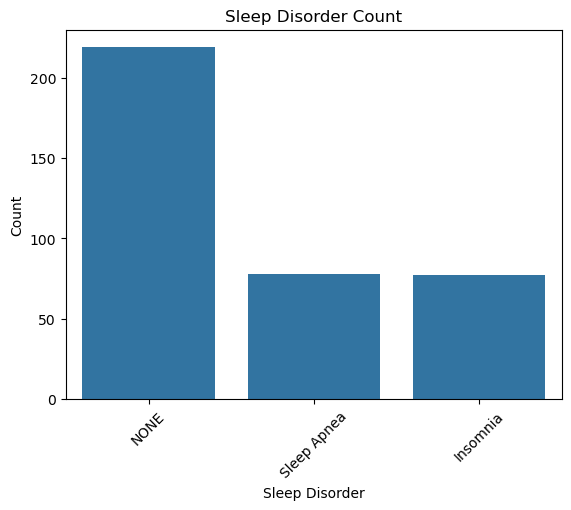

In [16]:
sns.barplot(x=sleep_disorder_count.index, y=sleep_disorder_count.values)
plt.title('Sleep Disorder Count')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The dataset shows that 219 individuals have no recorded sleep disorder (NONE), followed by 78 individuals with sleep apnea and 77 with insomnia. Sleep disorders are prevalent and may impact various aspects of health and well-being.
<hr>

Let's have a look at sleep disorder on the basis of the gender and calculate their mean sleep duration.

In [17]:
# Grouping by 'Gender' and 'Sleep Disorder' and calculating mean 'Sleep Duration'
df.groupby(['Gender', 'Sleep Disorder'])['Sleep Duration'].mean()

Gender  Sleep Disorder
Female  Insomnia          6.633333
        NONE              7.650000
        Sleep Apnea       7.035821
Male    Insomnia          6.551220
        NONE              7.183942
        Sleep Apnea       7.009091
Name: Sleep Duration, dtype: float64

The data indicates that females generally have shorter sleep durations than males. Individuals without sleep disorders tend to have longer sleep durations compared to those with insomnia or sleep apnea.

### Plotting the above bar plot

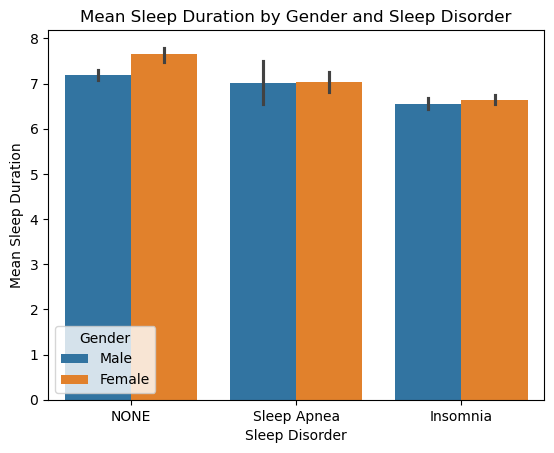

In [18]:
sns.barplot(x='Sleep Disorder', y='Sleep Duration', hue='Gender', data=df)
plt.title('Mean Sleep Duration by Gender and Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Mean Sleep Duration')
plt.show()


<hr>
Now, lets compare the quality of the sleep and the profession

In [19]:
# Grouping by 'Occupation' and calculating mean 'Quality of Sleep'
df.groupby('Occupation')['Quality of Sleep'].mean()


Occupation
Accountant              7.891892
Doctor                  6.647887
Engineer                8.412698
Lawyer                  7.893617
Manager                 7.000000
Nurse                   7.369863
Sales Representative    4.000000
Salesperson             6.000000
Scientist               5.000000
Software Engineer       6.500000
Teacher                 6.975000
Name: Quality of Sleep, dtype: float64

Quality of sleep varies across different occupations. Engineers have the highest average sleep quality, while sales representatives and scientists report the lowest. Occupational demands likely influence sleep patterns and overall well-being.

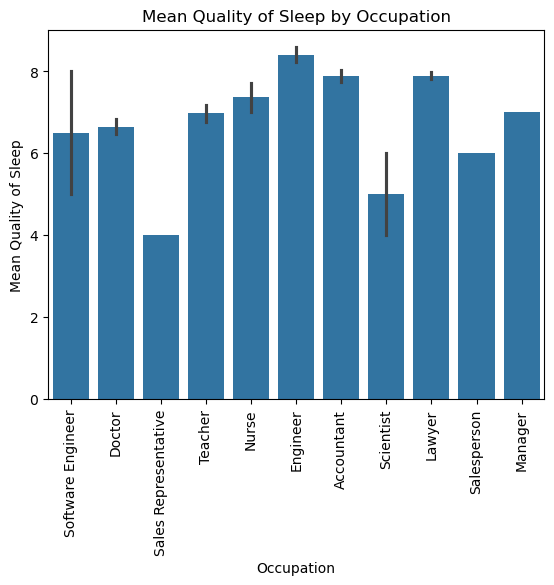

In [20]:
# Plotting the above result
sns.barplot(x='Occupation', y='Quality of Sleep', data=df)
plt.title('Mean Quality of Sleep by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Mean Quality of Sleep')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<hr>
High physical activity has always attributed with the better quality of the sleep. Let's see if that's the case.

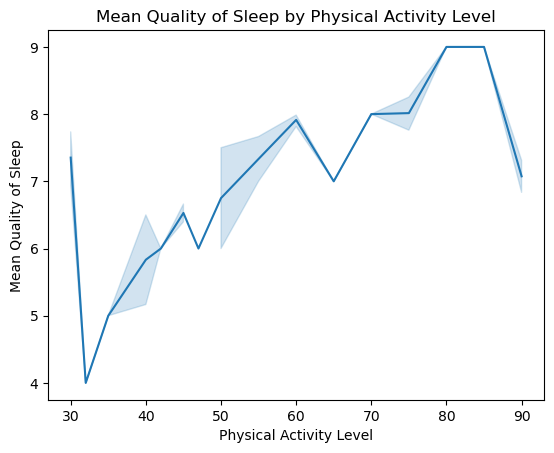

In [21]:
sns.lineplot(x='Physical Activity Level', y='Quality of Sleep', data=df)
plt.title('Mean Quality of Sleep by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Mean Quality of Sleep')
plt.show()

And so, Physical activity level greatly impacts sleep quality. Higher activity levels, such as those around 70-90, correlate with better sleep quality, while lower levels may lead to poorer sleep.

<hr>

Stress also plays an important factor in determining quality of sleep.

In [22]:
df.groupby('Stress Level')['Quality of Sleep'].mean()

Stress Level
3    8.971831
4    7.671429
5    7.895522
6    7.000000
7    6.000000
8    5.857143
Name: Quality of Sleep, dtype: float64

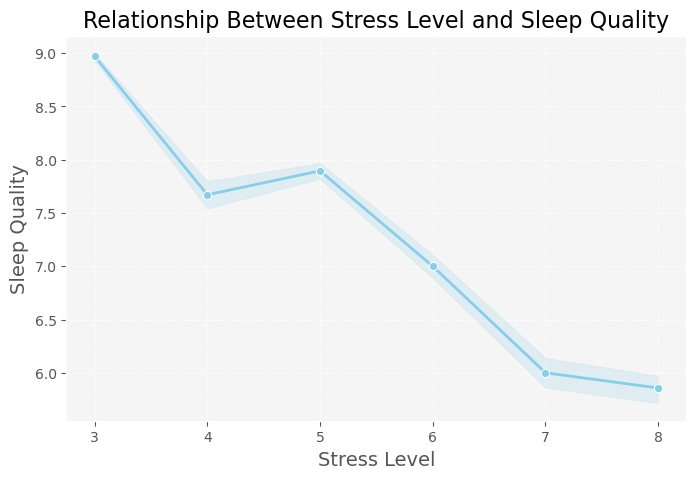

In [23]:
stress_levels = df['Stress Level']
quality_of_sleep = df['Quality of Sleep']

plt.style.use('ggplot')

plt.figure(figsize=(8, 5))
sns.lineplot(x=stress_levels, y=quality_of_sleep, marker='o', color='skyblue', linewidth=2)

plt.xlabel('Stress Level', fontsize=14)
plt.ylabel('Sleep Quality', fontsize=14)
plt.title('Relationship Between Stress Level and Sleep Quality', fontsize=16)

# Customize gridlines
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
# Show plot
plt.show()



Stress levels affect sleep quality inversely. Higher stress levels, such as those rated 8 or 9, correspond to poorer sleep quality, while lower stress levels correlate with better sleep.

In [24]:
df.groupby('Age')['Quality of Sleep'].mean()

Age
27    6.000000
28    4.800000
29    6.153846
30    6.692308
31    6.888889
32    6.529412
33    6.000000
34    4.000000
35    7.750000
36    7.500000
37    7.900000
38    7.950000
39    7.866667
40    8.000000
41    7.833333
42    7.333333
43    7.088235
44    6.400000
45    7.000000
48    6.666667
49    6.545455
50    6.150000
51    7.625000
52    7.666667
53    9.000000
54    9.000000
55    9.000000
56    9.000000
57    9.000000
58    9.000000
59    9.000000
Name: Quality of Sleep, dtype: float64

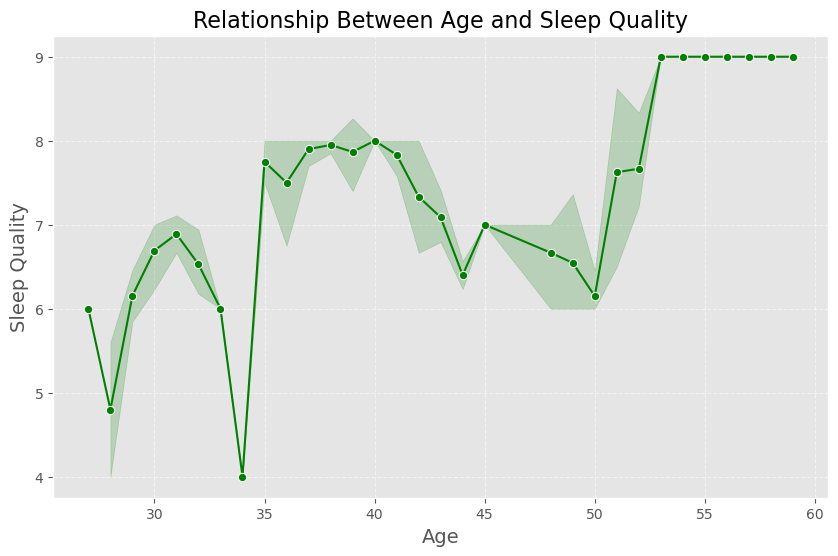

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Age'], y=df['Quality of Sleep'], marker='o', color='green')

# Add labels and title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Sleep Quality', fontsize=14)
plt.title('Relationship Between Age and Sleep Quality', fontsize=16)

# Customize gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


* Sleep quality tends to improve from around age 28 to 40, reaching a peak at approximately age 40 with a sleep quality score of 8.
* After age 40, sleep quality remains relatively high, consistently above 7, with occasional fluctuations.
* Notably, from age 53 onwards, sleep quality reaches its highest score of 9 and remains consistently high until age 59.


This observation may reflect changes in lifestyle, responsibilities, and physiological factors associated with aging. Further analysis could explore underlying factors contributing to these patterns.



## Data Preprocessing and Modeling

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Encode categorical variables using LabelEncoder to convert them into numerical representations
This helps in feeding categorical data into machine learning models which usually require numerical inputs

In [27]:
label_encoder = preprocessing.LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

In [28]:
# Split the dataframe into features (X) and target variable (y)
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier())
]

In [33]:
pipelines = []
for name, clf in classifiers:
    pipe = Pipeline([('scaler', scaler), ('model', clf)])
    pipelines.append((name, pipe))

In [34]:
for name, pipe in pipelines:
    print(f"Pipeline for {name}: {pipe}")

Pipeline for Random Forest: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])
Pipeline for Decision Tree: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])
Pipeline for KNN: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])


In [35]:
from sklearn.metrics import accuracy_score
for name, pipe in pipelines:
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {name}: {accuracy * 100:.2f}%')

Accuracy of Random Forest: 88.00%
Accuracy of Decision Tree: 89.33%
Accuracy of KNN: 85.33%


The Decision Tree classifier outperformed Random Forest and KNN with an accuracy of 89.33%, followed by Random Forest at 88.00%, and KNN at 85.33%. Decision Tree's ability to capture complex relationships yielded the highest accuracy, demonstrating its suitability for the dataset.

# Thank You !!!

In [36]:
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,2,126.83,77,4200
1,1,28,1,6.2,6,60,8,0,125.80,75,10000
2,1,28,1,6.2,6,60,8,0,125.80,75,10000
3,1,28,6,5.9,4,30,8,1,140.90,85,3000
4,1,28,6,5.9,4,30,8,1,140.90,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,2,140.95,68,7000
370,0,59,5,8.0,9,75,3,2,140.95,68,7000
371,0,59,5,8.1,9,75,3,2,140.95,68,7000
372,0,59,5,8.1,9,75,3,2,140.95,68,7000


In [37]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np


decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)



print("Please enter the following information:")
gender = int(input("Gender (Male/Female): "))
age = float(input("Age: "))
occupation = input("Occupation: ")
sleep_duration = float(input("Sleep Duration (hours): "))
quality_of_sleep = float(input("Quality of Sleep (scale from 0 to 10): "))
physical_activity_level = float(input("Physical Activity Level (scale from 0 to 10): "))
stress_level = float(input("Stress Level (scale from 0 to 10): "))
bmi_category = input("BMI Category: ")
blood_pressure = input("Blood Pressure: ")
heart_rate = float(input("Heart Rate (beats per minute): "))
daily_steps = float(input("Daily Steps: "))


# Make a prediction using the decision tree model
user_input = [[gender,age, occupation, sleep_duration, quality_of_sleep, physical_activity_level, stress_level, bmi_category,blood_pressure, heart_rate, daily_steps]]
prediction = decision_tree_model.predict(user_input)

# Map the prediction result to the corresponding sleep disorder
sleep_disorder_mapping = {0: "None", 1: "Sleep Apnea", 2: "Insomnia"}

# Display the prediction result to the user
print("\nPrediction for Sleep Disorder:")
if prediction[0] in sleep_disorder_mapping:
    print("Predicted Sleep Disorder:", sleep_disorder_mapping[prediction[0]])
else:
    print("Unknown Sleep Disorder")


Please enter the following information:

Prediction for Sleep Disorder:
Predicted Sleep Disorder: Insomnia


In [40]:
import joblib
joblib.dump(decision_tree_model, 'sleep_disorder_prediction_model.pkl')

['sleep_disorder_prediction_model.pkl']

In [2]:
import pickle
pickle.dump(model, open('SleepDT.pkl', 'wb'))

